<a href="https://colab.research.google.com/github/pratik4511/Lab/blob/main/Lab%232.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
from google.colab import files
files.upload()

Saving BostonHousing.csv to BostonHousing.csv


{'BostonHousing.csv': b'"crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"\n0.00632,18,2.31,"0",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,"0",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\n0.02729,0,7.07,"0",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\n0.03237,0,2.18,"0",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\n0.06905,0,2.18,"0",0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\n0.02985,0,2.18,"0",0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\n0.08829,12.5,7.87,"0",0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\n0.14455,12.5,7.87,"0",0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\n0.21124,12.5,7.87,"0",0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\n0.17004,12.5,7.87,"0",0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\n0.22489,12.5,7.87,"0",0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\n0.11747,12.5,7.87,"0",0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\n0.09378,12

In [ ]:
data = spark.read.csv('BostonHousing.csv',inferSchema=True, header=True)

In [ ]:

spark.sql("show databases").show()


+---------+
|namespace|
+---------+
|  default|
+---------+



In [ ]:
from pyspark.ml.feature import VectorAssembler

data.columns

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'b',
 'lstat',
 'medv']

In [ ]:
# Standardizing features
features= ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat']
assembler= VectorAssembler(inputCols = features,outputCol='features')

In [ ]:
# Train model for two principal component analysis

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler,StandardScaler,PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_feat = assembler.transform(data).select('features')

In [ ]:
Scaler = StandardScaler(
    inputCol ='Features',
    outputCol ='ScaledFeature',
    withMean = True,
    withStd = True).fit(df_feat)
df_scaled = Scaler.transform(df_feat)
df_scaled.show(10)

+--------------------+--------------------+
|            features|       scaledFeature|
+--------------------+--------------------+
|[0.00632,18.0,2.3...|[-0.4193669292132...|
|[0.02731,0.0,7.07...|[-0.4169266699640...|
|[0.02729,0.0,7.07...|[-0.4169289951277...|
|[0.03237,0.0,2.18...|[-0.4163384035610...|
|[0.06905,0.0,2.18...|[-0.4120740534296...|
|[0.02985,0.0,2.18...|[-0.4166313741807...|
|[0.08829,12.5,7.8...|[-0.4098372459997...|
|[0.14455,12.5,7.8...|[-0.4032965606564...|
|[0.21124,12.5,7.8...|[-0.3955433024705...|
|[0.17004,12.5,7.8...|[-0.4003331395864...|
+--------------------+--------------------+
only showing top 10 rows



In [ ]:
n_components = 2
pca = PCA(
     k = n_components,
     inputCol ='scaledFeature',
     outputCol='pcafeatures').fit(df_scaled)


In [25]:
df_pca=pca.transform(df_scaled)
print('Explained Variance Ratio : ',pca.explainedVariance.toArray())
df_pca.show(10)

Explained Variance Ratio :  [0.47129606 0.11025193]
+--------------------+--------------------+--------------------+
|            features|       scaledFeature|         pcafeatures|
+--------------------+--------------------+--------------------+
|[0.00632,18.0,2.3...|[-0.4193669292132...|[2.09622303023858...|
|[0.02731,0.0,7.07...|[-0.4169266699640...|[1.45581098944742...|
|[0.02729,0.0,7.07...|[-0.4169289951277...|[2.07254655194818...|
|[0.03237,0.0,2.18...|[-0.4163384035610...|[2.60892175886434...|
|[0.06905,0.0,2.18...|[-0.4120740534296...|[2.45575477193107...|
|[0.02985,0.0,2.18...|[-0.4166313741807...|[2.21266184319277...|
|[0.08829,12.5,7.8...|[-0.4098372459997...|[1.35753765586535...|
|[0.14455,12.5,7.8...|[-0.4032965606564...|[0.84121214171331...|
|[0.21124,12.5,7.8...|[-0.3955433024705...|[0.17975039564828...|
|[0.17004,12.5,7.8...|[-0.4003331395864...|[1.07312213803569...|
+--------------------+--------------------+--------------------+
only showing top 10 rows



In [26]:
X_pca=df_pca.rdd.map(lambda row:row.pcafeatures).collect()
X_pca=np.array(X_pca)

X_pca

array([[2.09622303, 0.77234843],
       [1.45581099, 0.59139995],
       [2.07254655, 0.59904658],
       ...,
       [0.31205166, 1.15410433],
       [0.27025162, 1.04033206],
       [0.12567884, 0.76122473]])

In [27]:
df_pca=pd.DataFrame(X_pca, columns=['PC1','PC2'])
df_pca.head()


,PC1,PC2
0,2.096223,0.772348
1,1.455811,0.591400
2,2.072547,0.599047
3,2.608922,-0.006864
4,2.455755,0.097615


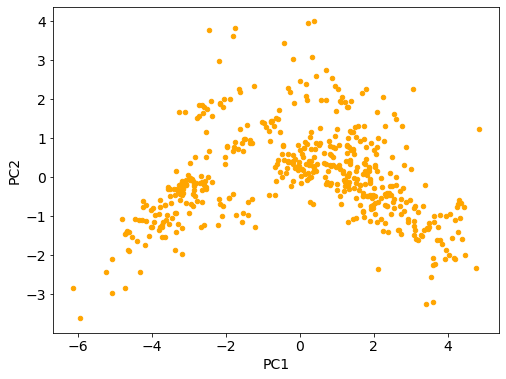

In [29]:
plt.rcParams['figure.figsize']=8,6
plt.rcParams['font.size']=14
ax1=df_pca.plot.scatter(x='PC1',y='PC2',c='orange')

In [30]:
output=assembler.transform(data)
f_data=output.select('features','medv')
f_data.show(5)

+--------------------+----+
|            features|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
|[0.03237,0.0,2.18...|33.4|
|[0.06905,0.0,2.18...|36.2|
+--------------------+----+
only showing top 5 rows



In [31]:
# dividing dtaset into training and testing.
train_data,test_data= f_data.randomSplit([0.70,0.30])

In [33]:
Regressor = LinearRegression(featuresCol='features',labelCol='medv')
Regressor = Regressor.fit(train_data)

In [36]:
coeff = Regressor.coefficients
intr = Regressor.intercept
print("The coefficient of the model :", coeff)
print("The intercept of the model :", intr)
print("The coefficient of the model %a" %coeff)
print("The intercept of the model %f " %intr)


The coefficient of the model : [-0.0995385907154912,0.02998746992568755,-0.03180198677182624,3.0832690888442236,-19.65878284453253,3.35862437310725,-0.008755298057585742,-1.5381203880324816,0.31533525689705616,-0.011995354974224218,-1.002723721919161,0.007753062539218153,-0.4849059169514114]
The intercept of the model : 42.67371142088813
The coefficient of the model DenseVector([-0.0995, 0.03, -0.0318, 3.0833, -19.6588, 3.3586, -0.0088, -1.5381, 0.3153, -0.012, -1.0027, 0.0078, -0.4849])
The intercept of the model 42.673711 


In [38]:
pred = Regressor.evaluate(test_data)
pred.predictions.show(10)

+--------------------+----+------------------+
|            features|medv|        prediction|
+--------------------+----+------------------+
|[0.01311,90.0,1.2...|35.4| 29.84274416827152|
|[0.01381,80.0,0.4...|50.0|39.621400498327176|
|[0.01439,60.0,2.9...|29.1| 31.23520457438586|
|[0.01538,90.0,3.7...|44.0| 36.05939797064249|
|[0.01709,90.0,2.0...|30.1|23.961190686284176|
|[0.01951,17.5,1.3...|33.0|  22.9751101986961|
|[0.02009,95.0,2.6...|50.0|41.552838861960836|
|[0.02055,85.0,0.7...|24.7| 23.93915416452991|
|[0.02177,82.5,2.0...|42.3| 35.97381302347769|
|[0.02763,75.0,2.9...|30.8|30.609849488027923|
+--------------------+----+------------------+
only showing top 10 rows



In [39]:
from pyspark.ml.evaluation import RegressionEvaluator
eval=RegressionEvaluator(labelCol='medv',predictionCol='prediction',metricName='rmse')

rmse=eval.evaluate(pred.predictions)
print("RMSE : %.3f" %rmse)

mse=eval.evaluate(pred.predictions,{eval.metricName:"mse"})
print("MSE : %.3f" %mse)

mae=eval.evaluate(pred.predictions,{eval.metricName:"mae"})
print("MAE : %.3f" %mae)

r2=eval.evaluate(pred.predictions,{eval.metricName:"r2"})
print("r2 : %.3f" %r2)

RMSE : 4.705
MSE : 22.137
MAE : 3.525
r2 : 0.778
